In [479]:
from pathlib import Path
import re
import nltk
import numpy as np

nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
import scipy.signal as signal

plt.style.use('seaborn')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Documents eda

* quali documenti, da dove sono stati presi?
* struttura Document, e assunzione fondamentale che i true breakpoints sono i paragrafi
(attenzione questo non è da dare per sconteto (vedi paper text tiling) in quanto a volte le persone dividono in paragrafi pù per una questione estetica che strutturale-semantica)


In [480]:
doc = Document(Path('data/memory_text_sgmentation.txt'), nltk.sent_tokenize)

### Glove embedding
* what is glove?
* perchè glove?
* glove vs word2vec vs tf-idf



In [88]:
glove_path = Path("data/glove/glove.6B.100d.txt")
glove = Glove(glove_path)

### Text segmentation

* spiegare task
* spiegare approccio (simil text tiling)
* possibili drawbacks e assunzioni fatte

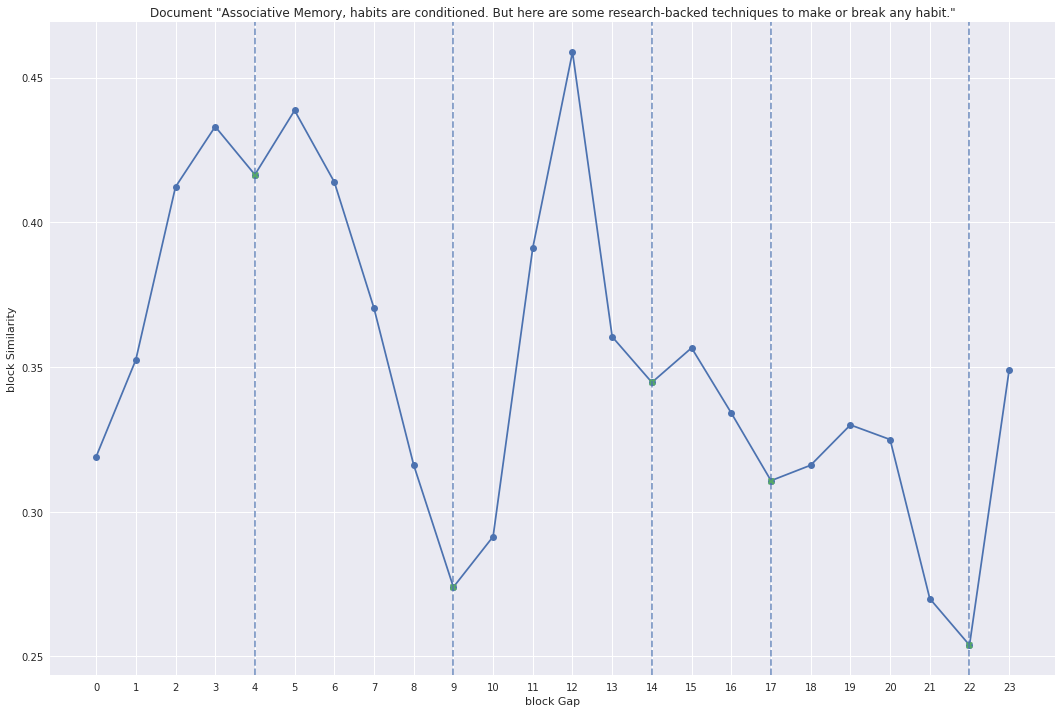

In [135]:
segmenter = TextSegmenter(preprocessor, glove, cosine_similarity)

breakpoints, similarities = segmenter.segment(document, **segmenter_kwargs)

fig, ax = plt.subplots(1,1,figsize=(18,12))

block_similarity_plot(ax, doc, segmenter)

spiegare l'utilità della funzione valley_to blocks e i due livelli di lavoro chunks-blocks

In [294]:
def valleys_to_breakpoint(blocks, valleys):
    chunks = []

    # from first block to the first break point
    [chunks.extend(block) for block in blocks[0:valleys[0]+1]]
    chunks.append(Document.BLOCK_SEPARATOR)

    for start, end in zip(valleys[0::], valleys[1::]):
        for block in blocks[start+1:end+1]:
            chunks.extend(block)
        chunks.append(Document.BLOCK_SEPARATOR)

    # from last breakpoint to the last block
    [chunks.extend(block) for block in blocks[valleys[-1]+1:]]

    # Search only for breakpoints
    sep_pos = [i for i,chunk in enumerate(chunks) 
                   if chunk == Document.BLOCK_SEPARATOR]
        
    breakpoints_pos = [(pos-1, pos) for pos in sep_pos] # we must take into account that pos when BLOCK_SEPARATOR is removed, is the right index of the next sentence (not pos+1)

    return breakpoints_pos, chunks



# TODO

1. Trovare un modo per valutare la distanza tra i break points trovati e quelli originali XXX
2. Effettuare valutazione su differenti testi
3. Utilizzare una versione più grande di glove
4. Refactoring codice + commenti 
5. Scrittura  markdown 

In [375]:
segmenter = TextSegmenter(preprocessor, glove, cosine_similarity)

valleys, sims, blocks= segmenter.segment(doc)
breakpoints, system_chunks = valleys_to_breakpoint(blocks, valleys)

true_breakpoints = np.array([breakpoint[0] for breakpoint in doc.get_breakpoints()])

system_breakpoints = np.array([breakpoint[0] for breakpoint in breakpoints])

In [377]:
np.abs(true_breakpoints-system_breakpoints).mean()

11.0

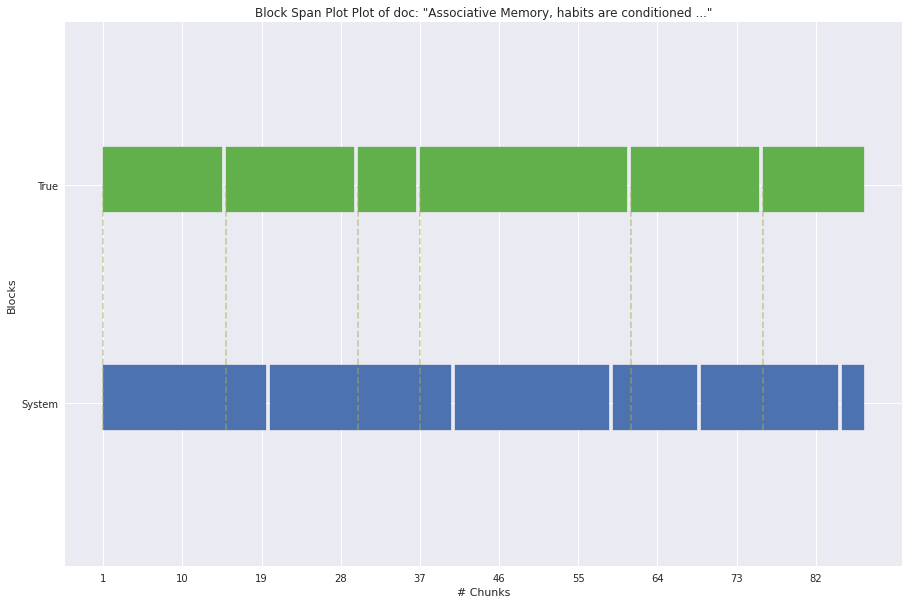

In [477]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
block_span_plot(ax, doc, true_breakpoints, system_breakpoints)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=afb22156-bb61-4d65-847d-18db79c0d4d2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>